# Performing Exploratory Data Analysis for Student Retention

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Prep plotting aesthetics
# Set font size names
SMALL_SIZE = 14
MEDIUM_SIZE = 16
# Set font sizes
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
# Set figure size
plt.rcParams["figure.figsize"] = (14, 8) # size of the figure plotted

## Loading in Data

In [2]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")

data.head()

,Unnamed: 0,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


Since we are focusing on retention rates, we are renaming the variable names for the "First-time, full-time student retention rate at four-year institutions" and "First-time, full-time student retention rate at less-than-four-year institutions" in order to improve identification of the main variables.

In [3]:
# First-time, full-time student retention rate at four-year institutions
four_yr_retention = data.RET_FT4

# First-time, full-time student retention rate at less-than-four-year institutions
less_four_yr_retention = data.RET_FTL4

## Histograms for Retention Rates

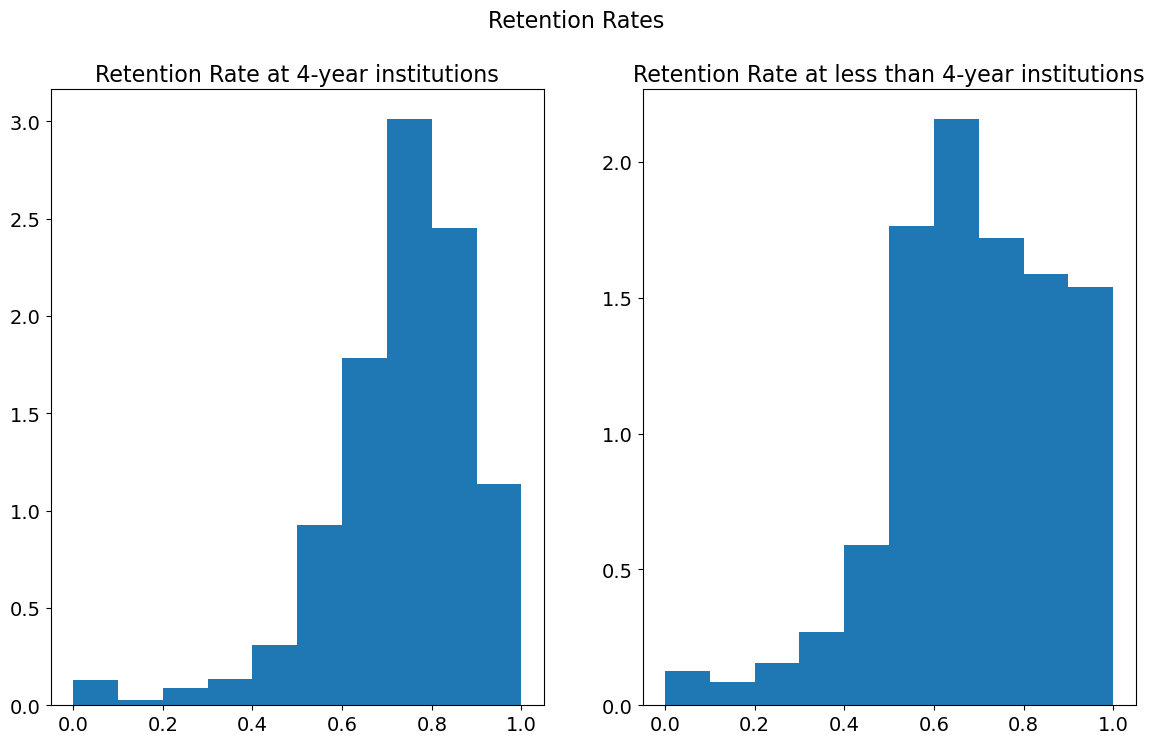

<Figure size 1400x800 with 0 Axes>

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(four_yr_retention, density = True)

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(less_four_yr_retention, density = True)

plt.show()
plt.savefig('figures/figure_1.png')

Based on the histograms, we notice that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

## How does the control of the school affect retention rates?

#### Public Schools

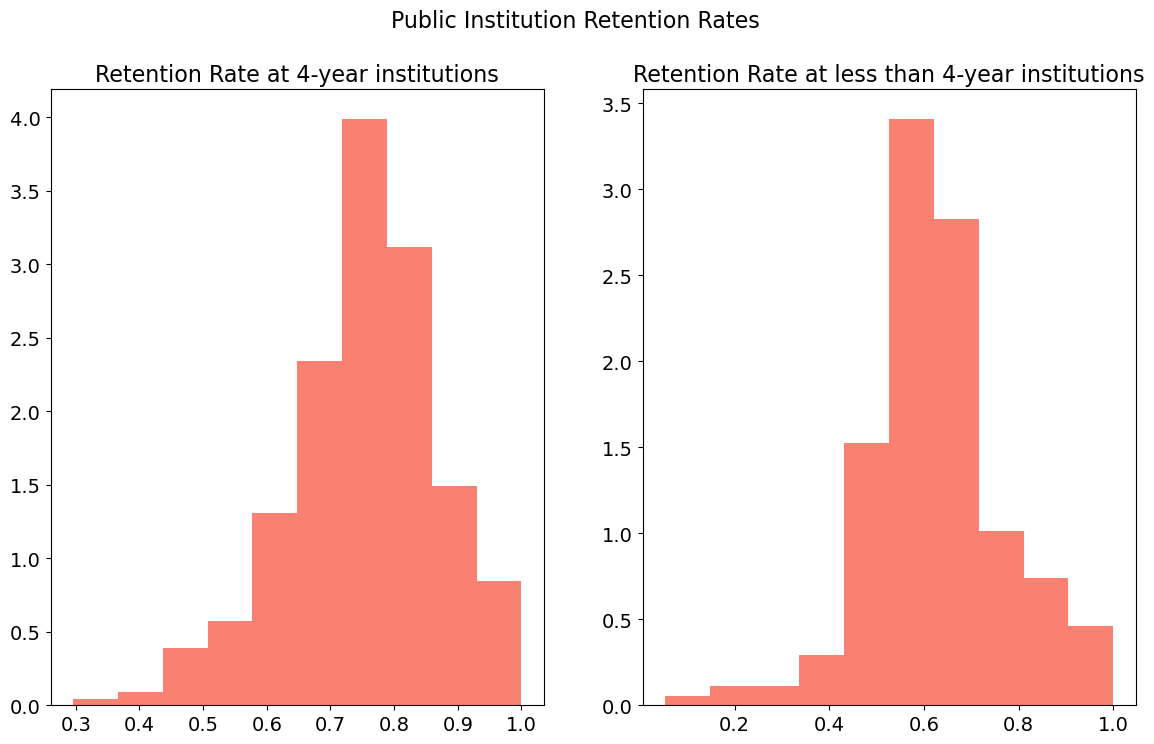

In [11]:
public = data.loc[data["CONTROL"] == 1]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Public Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(public.RET_FT4, density = True, color = "salmon")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(public.RET_FTL4, density = True, color = "salmon")

plt.show()

For public schools, the retention rates severely declines as the left-skewed distribution transforms into a normal distribution. The change is more noticeable in the retention rates of less than 4-year public institutions.

#### Private Non-Profit

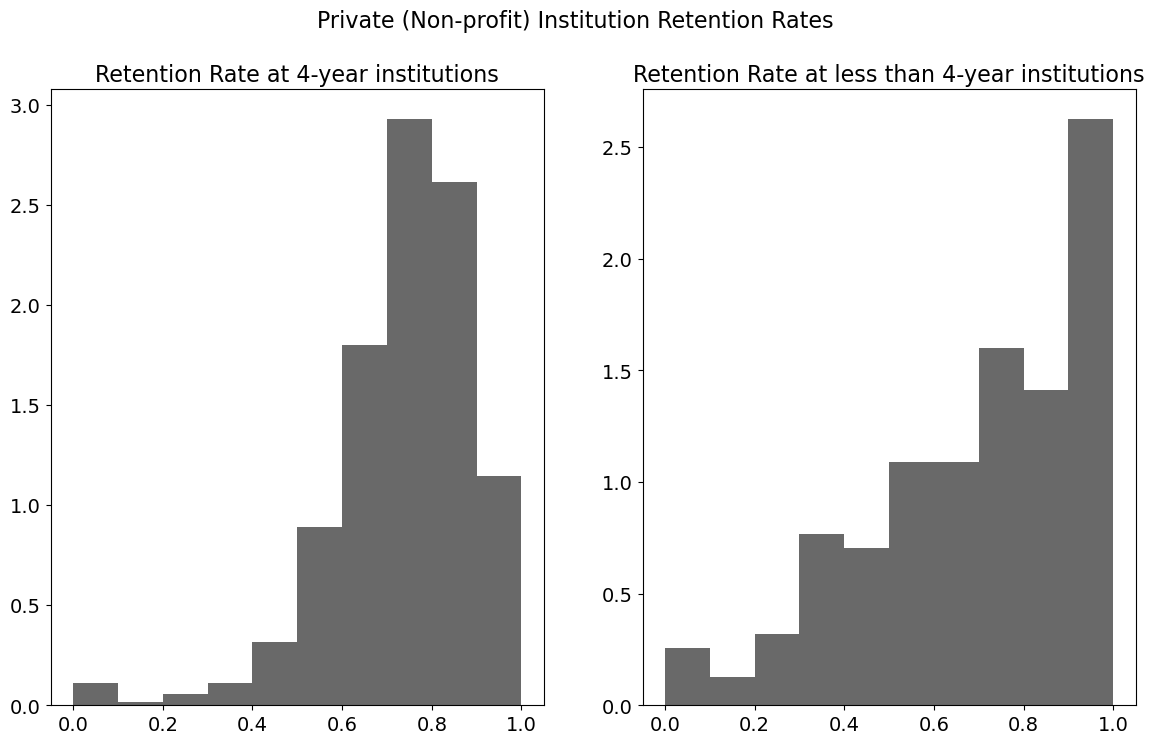

In [14]:
private_non_profit = data.loc[data["CONTROL"] == 2]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (Non-profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_non_profit.RET_FT4, density = True, color = "dimgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_non_profit.RET_FTL4, density = True, color = "dimgray")

plt.show()

In the case of non-profit private institutions, the retention rates for 4-year institutions appears to remain with the same. However, the retention for less than 4-year institution increases with the density focused in the 100% retention rate. 

#### Private For-Profit

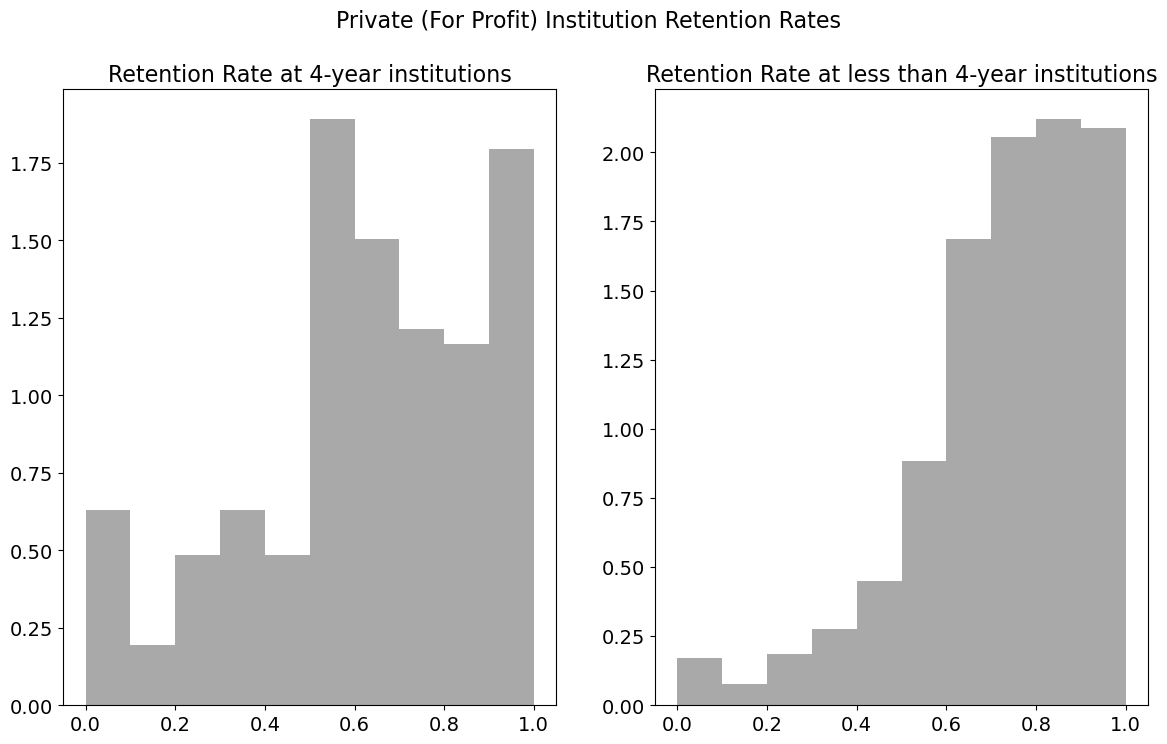

In [15]:
private_profit = data.loc[data["CONTROL"] == 3]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Private (For Profit) Institution Retention Rates')

ax1.set_title('Retention Rate at 4-year institutions')
ax1.hist(private_profit.RET_FT4, density = True, color = "darkgray")

ax2.set_title('Retention Rate at less than 4-year institutions')
ax2.hist(private_profit.RET_FTL4, density = True, color = "darkgray")

plt.show()

As for-profit private institutions, the retention rate for 4-year institutions maintains a left skewed distribution. However, a spike appears around the the 50% mark which indicates a slightly worse retention than the overall. As for the less than 4-year institution, the retention increases similarly to the non-profit institution as the density is focused on the higher end of the retention rates.